This is a small Jupyter Notebook with some exercices to test how well you can handle basic dataframes, train models, evaluate models and present the results.

In [257]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Markdown, display

#import sklearn for  
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split

#import skforecasting for Time Series Forecasting
#from skforecast.recursive import ForecasterRecursive, ForecasterAutoreg

def printmd(string):
    display(Markdown(string))

Open the dataframe in data_example.csv, and plot the data. Convert the time to datetime (it is in unix ms) before plotting for each serial_no value.

date
2022-05-05 05:53:20    255
2022-07-16 14:00:00    240
2022-07-16 16:46:40    239
2022-07-13 19:20:00    238
2022-07-18 10:26:40    238
                      ... 
2022-05-10 16:26:40     23
2022-05-10 19:13:20     23
2022-05-17 04:00:00     23
2022-06-23 10:26:40      5
2022-06-14 18:06:40      1
Name: count, Length: 672, dtype: int64


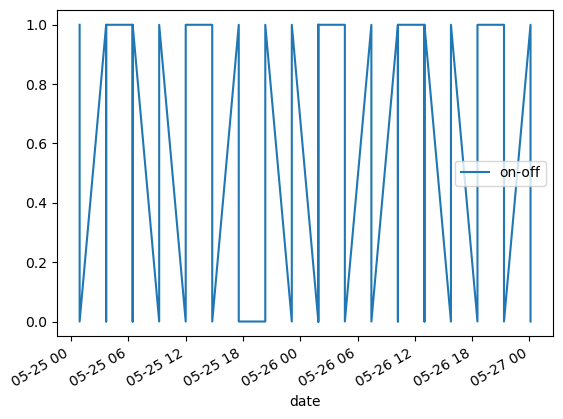

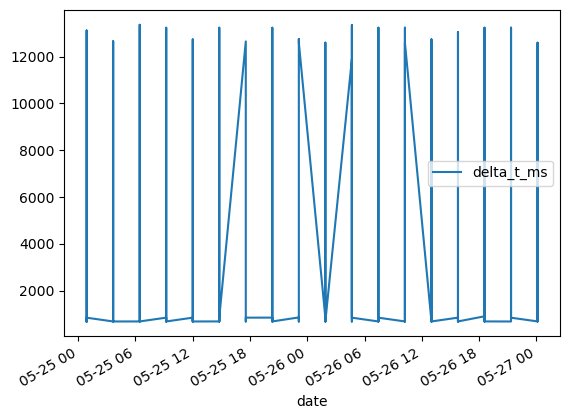

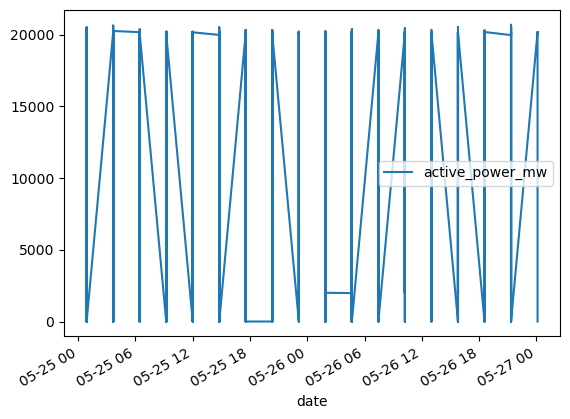

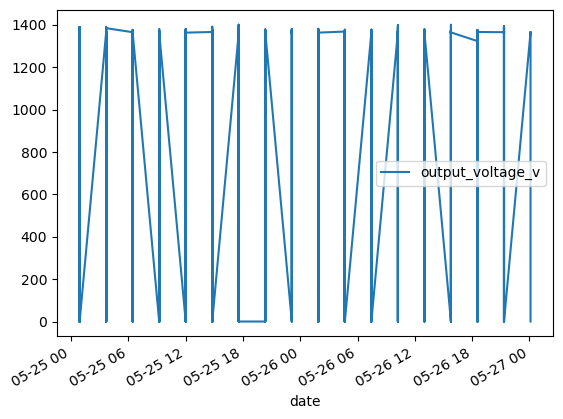

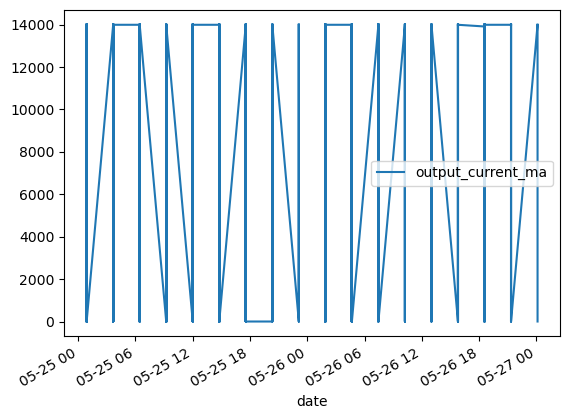

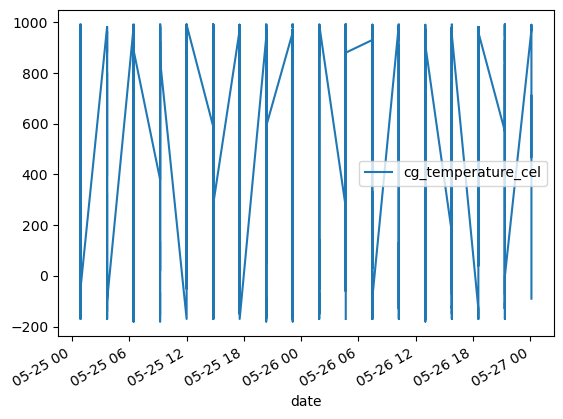

In [ ]:
# open data_example.csv
df = pd.read_csv('data.csv')
#df = pd.read_excel('data.xlsx')

# Dropping first two columns - is there an issue with the data?
df.drop(['Column1', 'Unnamed: 0'], axis=1, inplace=True)
df.drop_duplicates(inplace=True)

# convert timestamps
df['start_time_unix_ms'] = pd.to_datetime(df['start_time_unix_ms'], unit='ms')
df = df.rename({'start_time_unix_ms': 'date'}, axis=1)
df.sort_values(by='date', ascending = True, inplace = True) # re-order by date

# Sort by serial number
serial_numbers = df['serial_no'].unique() # Only 227 and 30

# Get by serial number
df_30 = df[df['serial_no'] == 30]
df_227 = df[df['serial_no'] == 227]


time_frames_30 = df_30['date'].value_counts() # Only 227 and 30
time_frames_30.to_csv('samples/time_count.csv')

sample_30 = df_30.iloc[20000:22000]
#sample_30.to_csv('sample_30_65-66.csv')

sample_30.plot(x="date", y="on-off")
sample_30.plot(x="date", y="delta_t_ms")
sample_30.plot(x="date", y="active_power_mw")
sample_30.plot(x="date", y="output_voltage_v")
sample_30.plot(x="date", y="output_current_ma")
sample_30.plot(x="date", y="cg_temperature_cel")
plt.show()

sample_30.plot(x="date", y=[
    "on-off",
    "delta_t_ms",
    "active_power_mw",
    "output_voltage_v",
    "output_current_ma",
    "cg_temperature_cel"
])


plt.savefig('plots/sample_30.jpg')
plt.close()  # prevents figure from being displayed when code cell is executed



sample_227 = df_227.iloc[20000:22000]

#sample_227.plot(x="date", y="on-off")
#sample_227.plot(x="date", y="delta_t_ms")
#sample_227.plot(x="date", y="active_power_mw")
#sample_227.plot(x="date", y="output_voltage_v")
#sample_227.plot(x="date", y="output_current_ma")
#sample_227.plot(x="date", y="cg_temperature_cel")

sample_227.plot(x="date", y=[
    
    "on-off",
    "delta_t_ms",
    "active_power_mw",
    "output_voltage_v",
    "output_current_ma",
    "cg_temperature_cel"
])
#plt.show()
plt.savefig('plots/sample_227.jpg')
plt.close()  # prevents figure from being displayed when code cell is executed


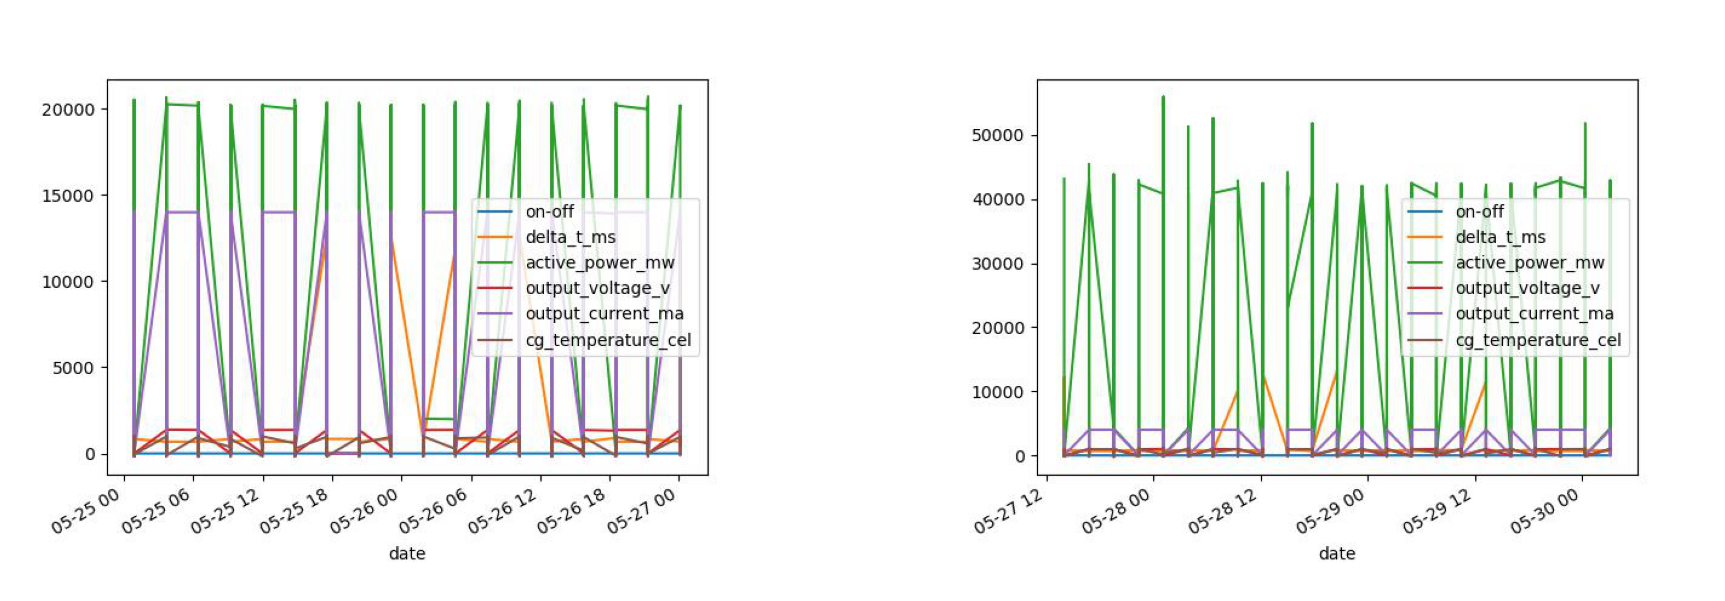

In [301]:
#Display the results

img_30 = mpimg.imread('plots/sample_30.jpg')
img_227 = mpimg.imread('plots/sample_227.jpg')

# create the subplot axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 16))

# plot the images
ax1.imshow(img_30)
ax2.imshow(img_227)

# turn of the axis
ax1.axis('off')
_ = ax2.axis('off')

Choose a serial_no, and get the points corresponding to this serial_no.

Make two regresion models to predict the values of active_power_w, output_voltage_v and output_current_ma from the columns delta_t_ms, on off, cg_temperature_cel (you dont have to use all the columns if you dont need to!), and compare the models. The two regresion algorithms must use diferent algorithms.

In [275]:
# Filter by serial number
    # Useful resource for filtering by column: https://sparkbyexamples.com/pandas/pandas-filter-by-column-value/
df_30 = df[df['serial_no'] == 30]

# Transform the values
def to_on_off(val, mean) -> int:
    if (val > mean):
        return 1
    else:
        return 0

# Future works - mean might not be the best thing to use to discern between the two categories
# but in the interest of time that's what I'm using here
output_voltage_mean = df_30.loc[:,'output_voltage_v'].mean()
output_current_mean = df_30.loc[:,'output_current_ma'].mean()
active_power_mean = df_30.loc[:,'active_power_mw'].mean()
print('Output Voltage Mean', output_voltage_mean)
print('Output Current Mean',output_current_mean)
print('Active Power Mean',active_power_mean)

df_30['output_voltage_on_off'] = df_30.loc[:,'output_voltage_v'].apply(lambda x: to_on_off(x,output_voltage_mean))
df_30['output_current_on_off'] = df_30.loc[:,'output_current_ma'].apply(lambda x: to_on_off(x,output_current_mean))
df_30['active_power_on_off'] = df_30.loc[:,'active_power_mw'].apply(lambda x: to_on_off(x,active_power_mean))
#print(df_30.head(50))


#sample_30 = df_30.iloc[65000:66000]
#sample_30.to_csv('sample_30_65-66.csv')


Output Voltage Mean 804.5931332423829
Output Current Mean 8234.794452023647
Active Power Mean 10699.900479034653


/var/folders/ch/4m8xlc297wn8w8_5bk61fd740000gn/T/ipykernel_23690/1264525968.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_30['output_voltage_on_off'] = df_30.loc[:,'output_voltage_v'].apply(lambda x: to_on_off(x,output_voltage_mean))
/var/folders/ch/4m8xlc297wn8w8_5bk61fd740000gn/T/ipykernel_23690/1264525968.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_30['output_current_on_off'] = df_30.loc[:,'output_current_ma'].apply(lambda x: to_on_off(x,output_current_mean))
/var/folders/ch/4m8xlc2

In [294]:
# Get the training and testing data ready for both models
df_30_nonan = df_30.dropna(how='any') # Drop rows where there are nan values as the models won't know what to do with those
x = df_30_nonan[['cg_temperature_cel', 'on-off', 'delta_t_ms']]
#x = df_30_nonan[[ 'on-off']]
active_power_y = df_30_nonan['active_power_on_off']
output_voltage_y = df_30_nonan['output_voltage_on_off']
output_current_y = df_30_nonan['output_current_on_off']
test_size = 0.3

# We have to split our data between training set, and testing set.
x_power_train, x_power_test, y_power_train, y_power_test = train_test_split(x, active_power_y, test_size = test_size)
x_voltage_train, x_voltage_test, y_voltage_train, y_voltage_test = train_test_split(x, output_voltage_y, test_size = test_size)
x_current_train, x_current_test, y_current_train, y_current_test = train_test_split(x, output_current_y, test_size = test_size)


In [295]:
## model 1

# Linear regression models for output power, voltage and current. Assuming this does not work well.
linear_regr_power = linear_model.LinearRegression()
linear_regr_voltage = linear_model.LinearRegression()
linear_regr_current = linear_model.LinearRegression()

# training model 1
linear_regr_power.fit(x_power_train, y_power_train)
linear_regr_voltage.fit(x_voltage_train, y_voltage_train)
linear_regr_current.fit(x_current_train, y_current_train)

# evaluating model1
predictions_power = linear_regr_power.predict(x_power_test)
predictions_voltage = linear_regr_voltage.predict(x_voltage_test)
predictions_current = linear_regr_current.predict(x_current_test)

mae_power = metrics.mean_absolute_error(y_power_test, predictions_power)
mse_power = metrics.mean_squared_error(y_power_test, predictions_power)
r2_power = metrics.r2_score(y_power_test, predictions_power)

mae_voltage = metrics.mean_absolute_error(y_voltage_test, predictions_voltage)
mse_voltage = metrics.mean_squared_error(y_voltage_test, predictions_voltage)
r2_voltage = metrics.r2_score(y_voltage_test, predictions_voltage)


mae_current = metrics.mean_absolute_error(y_current_test, predictions_current)
mse_current = metrics.mean_squared_error(y_current_test, predictions_current)
r2_current = metrics.r2_score(y_current_test, predictions_current)


printmd("# Linear Regression model")

printmd("## Power")
print("Power MAE: " ,mae_power)
print("Power MSE: ", mse_power)
print("R2 power", r2_power)
#plt.scatter(y_power_test, predictions_power)
#plt.show()
print("")

printmd("## Voltage")
print("Voltage MAE: " ,mae_voltage)
print("Voltage MSE: ", mse_voltage)
print("R2 voltage", r2_voltage)
#plt.scatter(y_voltage_test, predictions_voltage)
#plt.show()

printmd("## Current")
print("Current MAE: " ,mae_current)
print("Current MSE: ", mse_current)
print("R2 current", r2_current)
#plt.scatter(y_current_test, predictions_current)
#plt.show()

# Linear Regression model

## Power

Power MAE:  0.1155966230984606
Power MSE:  0.056463279786423445
R2 power 0.7729913103104022



## Voltage

Voltage MAE:  0.009033108426768154
Voltage MSE:  0.0044665575967689115
R2 voltage 0.981380804417224


## Current

Current MAE:  0.010323972517497018
Current MSE:  0.0050937188245023055
R2 current 0.9787177571605867


In [296]:
# model 2
# Logistic regression. See example: https://www.datacamp.com/tutorial/understanding-logistic-regression-python

logistic_regr_power = linear_model.LogisticRegression()
logistic_regr_voltage = linear_model.LogisticRegression()
logistic_regr_current = linear_model.LogisticRegression()

# training model 2
logistic_regr_power.fit(x_power_train, y_power_train)
logistic_regr_voltage.fit(x_voltage_train, y_voltage_train)
logistic_regr_current.fit(x_current_train, y_current_train)

# evaluating model 2
target_names = ['off', 'on']
predictions_power = logistic_regr_power.predict(x_power_test)
predictions_voltage = logistic_regr_voltage.predict(x_voltage_test)
predictions_current = logistic_regr_current.predict(x_current_test)


mse_power = metrics.mean_squared_error(y_power_test, predictions_power)
cnf_matrix_power = metrics.confusion_matrix(y_power_test, predictions_power)
class_power = metrics.classification_report(y_power_test, predictions_power, target_names=target_names,  output_dict=True)


mse_voltage = metrics.mean_squared_error(y_voltage_test, predictions_voltage)
cnf_matrix_voltage = metrics.confusion_matrix(y_voltage_test, predictions_voltage)
class_voltage = metrics.classification_report(y_voltage_test, predictions_voltage, target_names=target_names, output_dict=True)

mse_current = metrics.mean_squared_error(y_current_test, predictions_current)
cnf_matrix_current = metrics.confusion_matrix(y_current_test, predictions_current)
class_current = metrics.classification_report(y_current_test, predictions_current, target_names=target_names,  output_dict=True)

printmd("# Logistic Regression model")

printmd("## Power")
print("Power MSE: ", mse_power)
print("Power confusion matrix: ", cnf_matrix_power)
print("Classification report power: ", class_power)

#plt.scatter(y_power_test, predictions_power)
#plt.show()
print("")

printmd("## Voltage")
print("Voltage MSE: ", mse_voltage)
print("Voltage confusion matrix: ", cnf_matrix_voltage)
print("Classification report voltage: ", class_voltage)

#plt.scatter(y_voltage_test, predictions_voltage)
#plt.show()

printmd("## Current")
print("Current MSE: ", mse_current)
print("Curernt confusion matrix: ", cnf_matrix_current)
print("Classification report current: ", class_current)
#plt.scatter(y_current_test, predictions_current)
#plt.show()


# Logistic Regression model

## Power

Power MSE:  0.06316661489075283
Power confusion matrix:  [[ 7748  1220]
 [    0 10346]]
Classification report power:  {'off': {'precision': 1.0, 'recall': 0.8639607493309545, 'f1-score': 0.9270160325436707, 'support': 8968.0}, 'on': {'precision': 0.8945184160470344, 'recall': 1.0, 'f1-score': 0.9443227455275648, 'support': 10346.0}, 'accuracy': 0.9368333851092472, 'macro avg': {'precision': 0.9472592080235172, 'recall': 0.9319803746654772, 'f1-score': 0.9356693890356178, 'support': 19314.0}, 'weighted avg': {'precision': 0.9434962997008709, 'recall': 0.9368333851092472, 'f1-score': 0.9362867818722079, 'support': 19314.0}}



## Voltage

Voltage MSE:  0.0045045045045045045
Voltage confusion matrix:  [[ 7665    50]
 [   37 11562]]
Classification report voltage:  {'off': {'precision': 0.9951960529732538, 'recall': 0.9935191186001296, 'f1-score': 0.9943568787701887, 'support': 7715.0}, 'on': {'precision': 0.9956941095418532, 'recall': 0.9968100698336063, 'f1-score': 0.9962517771746154, 'support': 11599.0}, 'accuracy': 0.9954954954954955, 'macro avg': {'precision': 0.9954450812575535, 'recall': 0.995164594216868, 'f1-score': 0.9953043279724021, 'support': 19314.0}, 'weighted avg': {'precision': 0.9954951602601538, 'recall': 0.9954954954954955, 'f1-score': 0.9954948577798681, 'support': 19314.0}}


## Current

Current MSE:  0.005125815470643057
Curernt confusion matrix:  [[ 7613    50]
 [   49 11602]]
Classification report current:  {'off': {'precision': 0.9936048029235187, 'recall': 0.9934751402844839, 'f1-score': 0.9935399673735726, 'support': 7663.0}, 'on': {'precision': 0.9957088911774803, 'recall': 0.9957943524161016, 'f1-score': 0.9957516199630949, 'support': 11651.0}, 'accuracy': 0.9948741845293569, 'macro avg': {'precision': 0.9946568470504995, 'recall': 0.9946347463502927, 'f1-score': 0.9946457936683337, 'support': 19314.0}, 'weighted avg': {'precision': 0.9948740755882648, 'recall': 0.9948741845293569, 'f1-score': 0.99487412727419, 'support': 19314.0}}


Make a model that predicts the future values of active_power_w based on the past values of active_power_w.

In [293]:
# model

# train the model

# evaluate the model

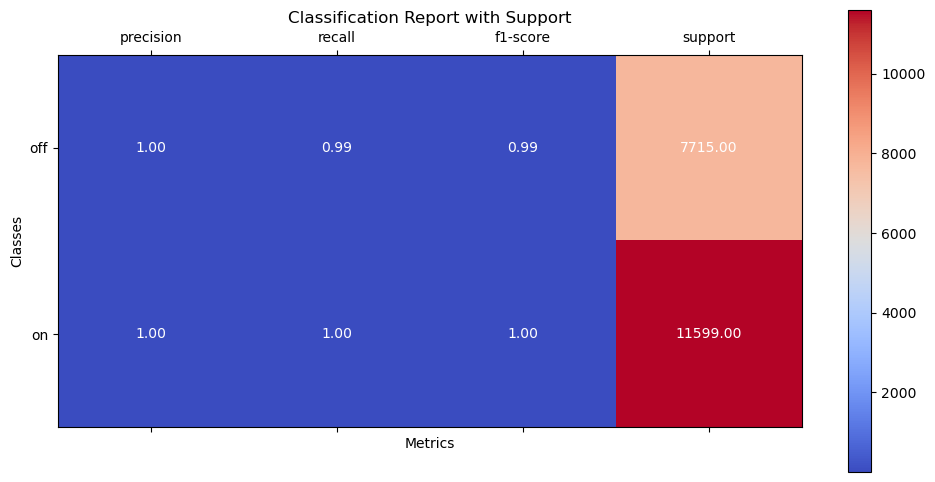

In [298]:
# Function to plot classification report with support
def plot_classification_report_with_support(report):
    #print()
    labels = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'
    metrics = ['precision', 'recall', 'f1-score', 'support']
    data = np.array([[report[label][metric] for metric in metrics] for label in labels])
    fig, ax = plt.subplots(figsize=(12, 6))
    cax = ax.matshow(data, cmap='coolwarm')
    plt.xticks(range(len(metrics)), metrics)
    plt.yticks(range(len(labels)), labels)
    plt.colorbar(cax)
    # Adding the text
    for (i, j), val in np.ndenumerate(data):
        ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='white')
    plt.xlabel('Metrics')
    plt.ylabel('Classes')
    plt.title('Classification Report with Support')
    plt.show()

plot_classification_report_with_support(class_current)


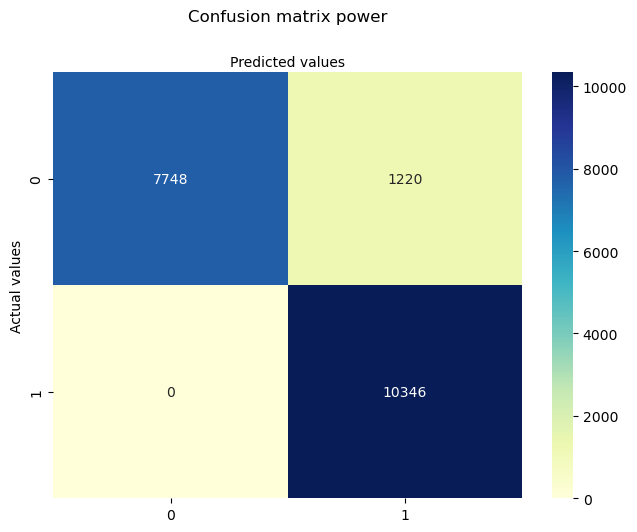

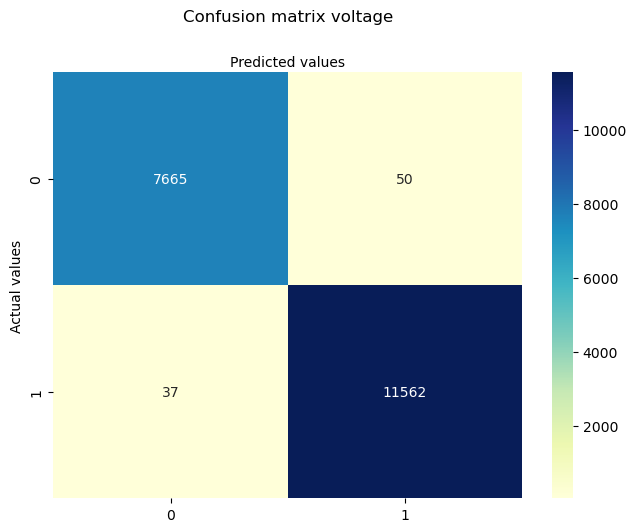

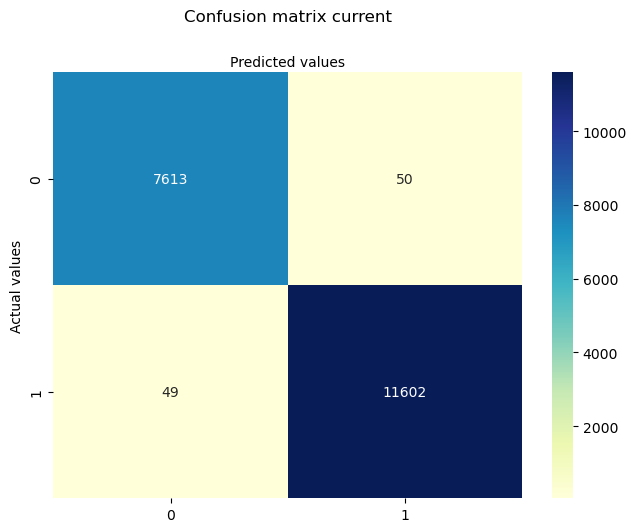

In [299]:
import seaborn as sns
def plot_confusion_matrix(cnf_matrix, title):
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix ' + title, y=1.1)
    plt.ylabel('Actual values')
    plt.xlabel('Predicted values')

plot_confusion_matrix(cnf_matrix_power, title="power")
plot_confusion_matrix(cnf_matrix_voltage, title="voltage")
plot_confusion_matrix(cnf_matrix_current, title="current")

